In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Carregando base de dados com todos os resultados

In [8]:
df =  pd.read_csv("../results_models/all_results/CISIA-ALL-Experiments.csv")

### Análise de correlação para cada produto

In [9]:
# INFO: Filtrando apenas os modelos que possuem zero shot
df_filtrado = df[df["GRANU"].str.contains("_ZS", na=False)] 

In [11]:
df_filtrado['MODEL'].unique().tolist()

['Chronos', 'LagLlama', 'TimeGPT', 'TimeMoE', 'Morai-MoE', 'TimesFM']

In [12]:
def plot_correlations(df):
    for product, group in df.groupby("PRODUCT"):
        model_series = {}

        for model, model_group in group.groupby("MODEL"):
            # Extrair todas as predições P1 a P60 e achatar para um único array
            pred_values = model_group[['P' + str(i) for i in range(1, 61)]].values.flatten()

            # Remover valores NaN antes de concatenar
            pred_values = pred_values[~np.isnan(pred_values)]

            # Garantir que temos valores suficientes para calcular a correlação
            if len(pred_values) > 0:
                model_series[model] = pred_values

        # Criar DataFrame das séries para calcular a correlação
        model_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in model_series.items()])).fillna(0)

        # Criar matriz de correlação
        correlation_matrix = model_df.corr()

        # Criar figura
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f'Correlação entre Modelos - {product}')
        plt.xlabel("Modelos")
        plt.ylabel("Modelos")
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.show()


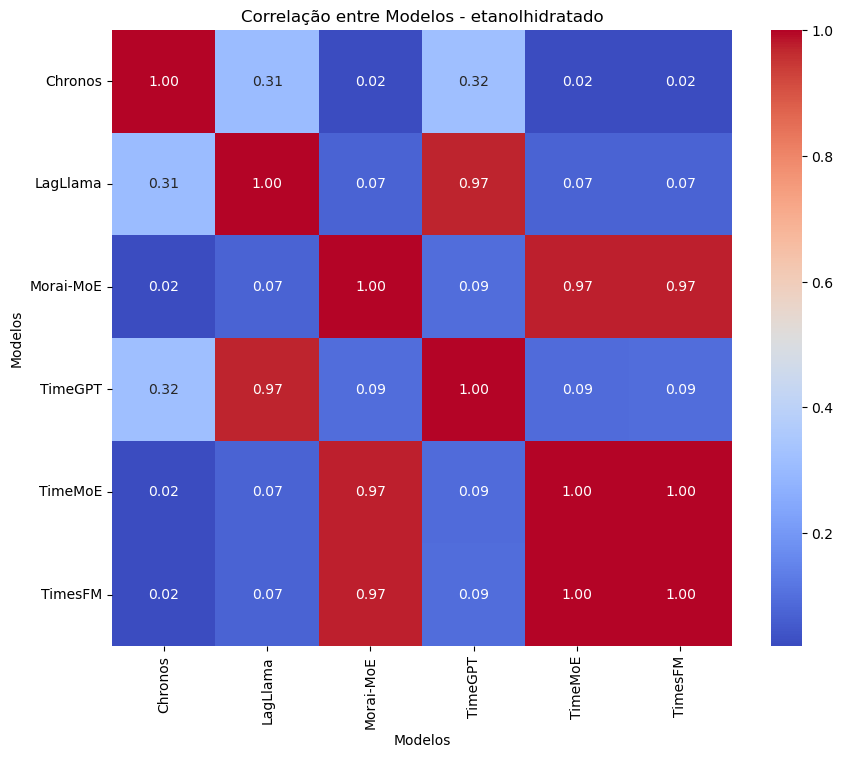

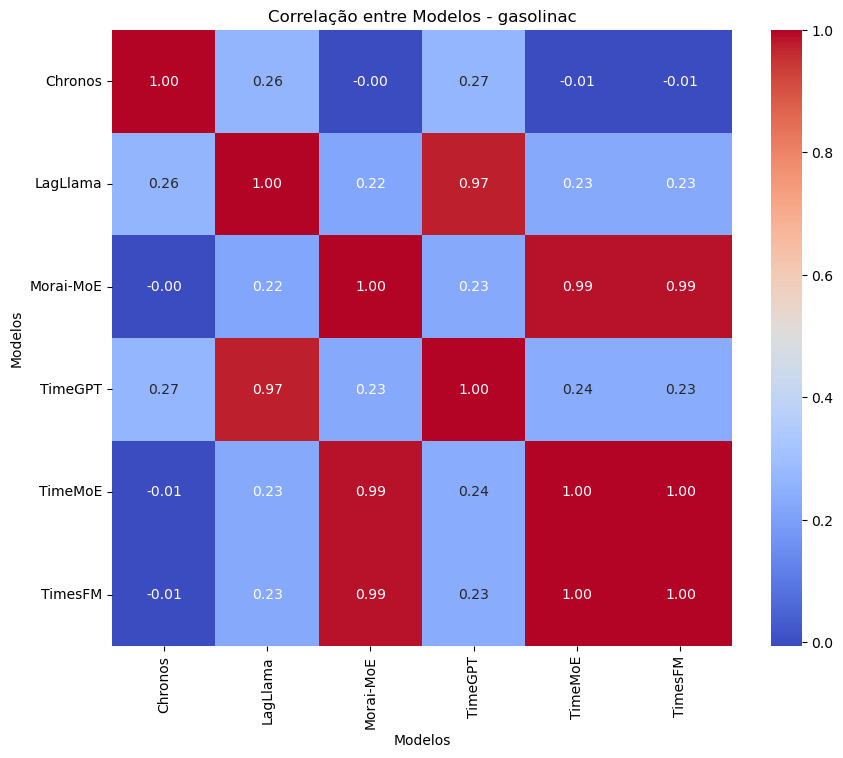

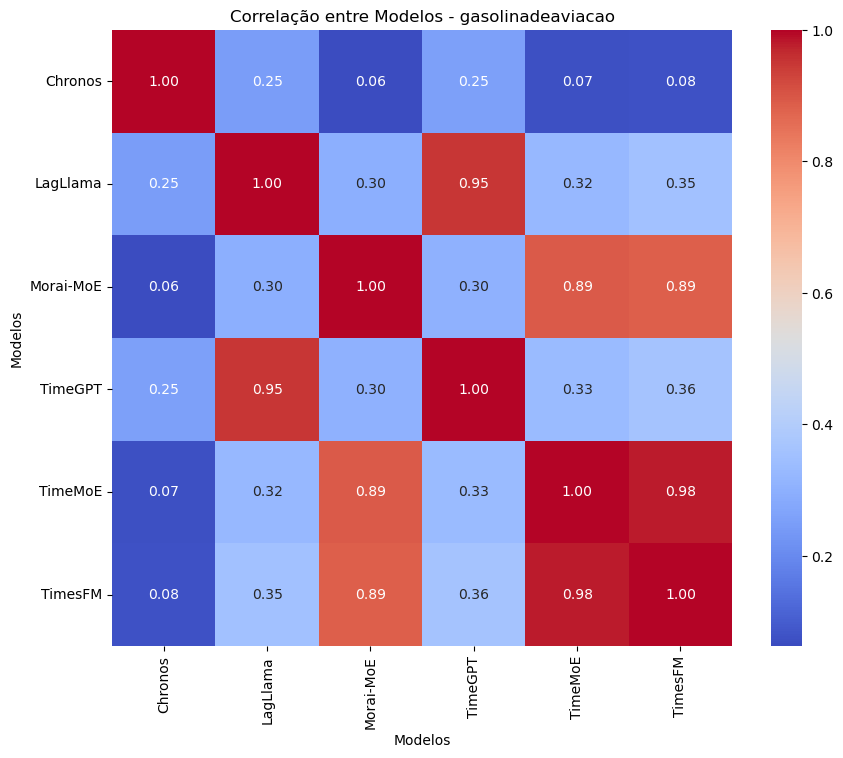

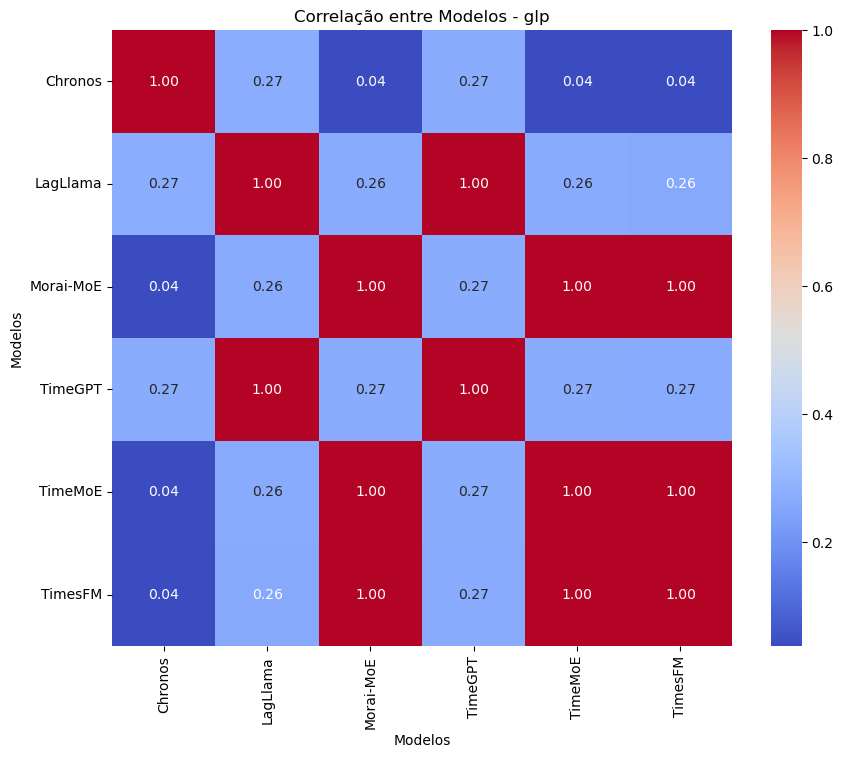

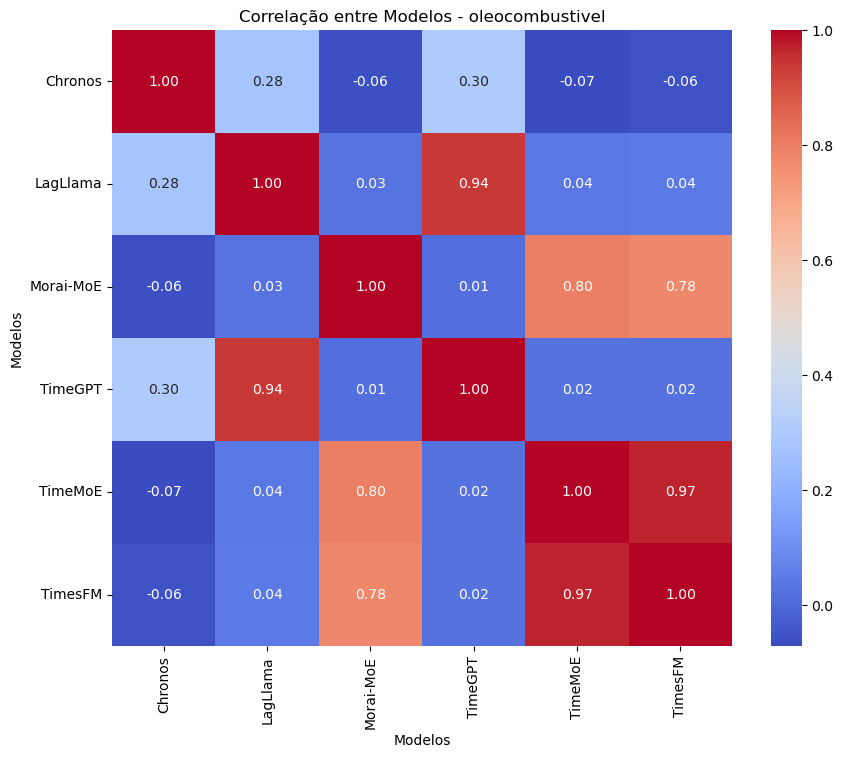

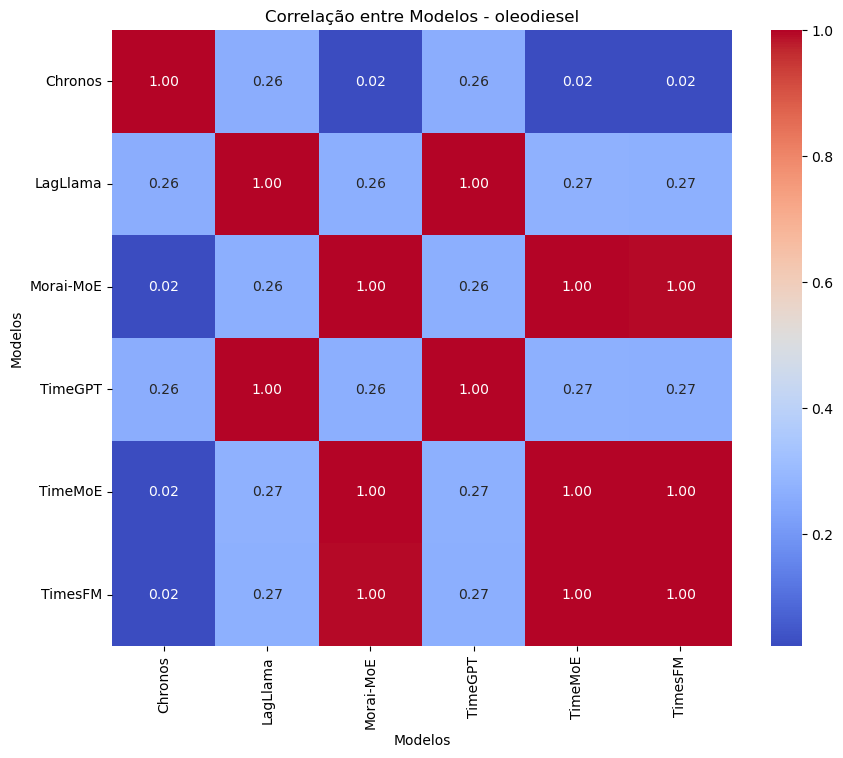

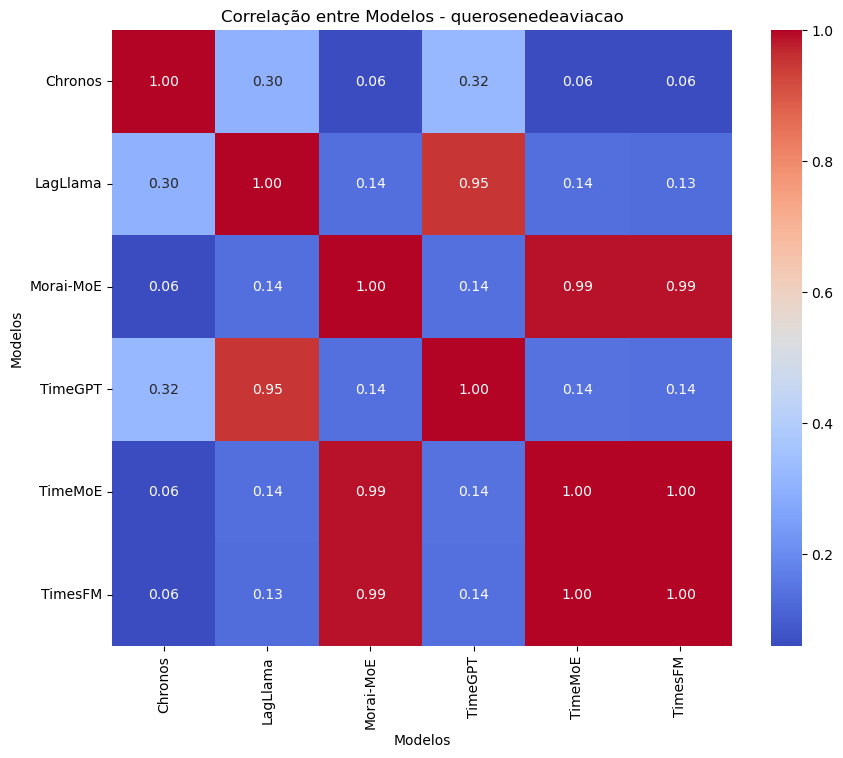

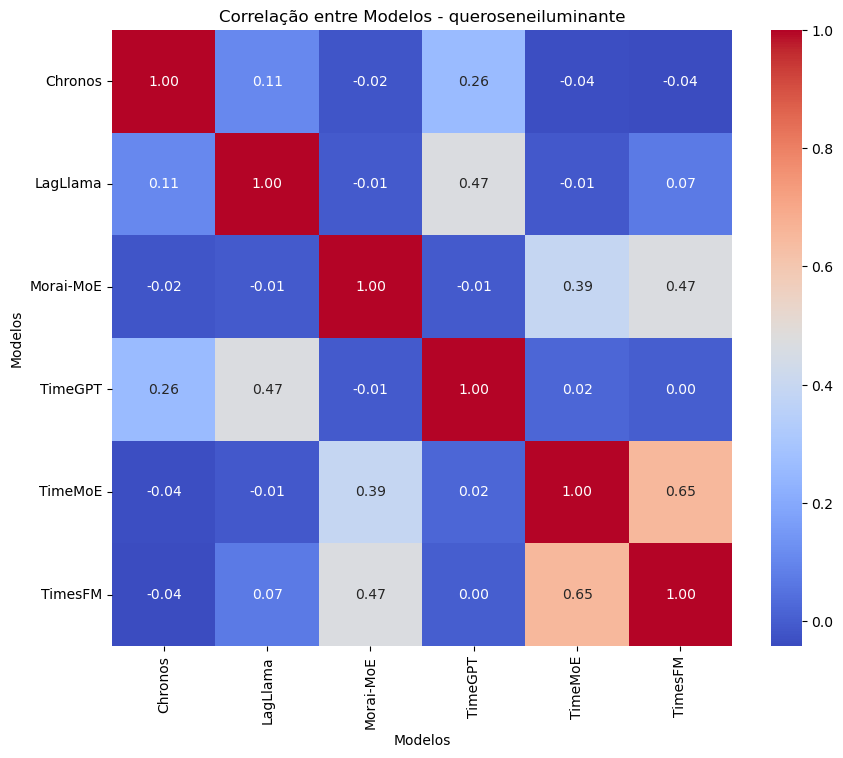

In [13]:
plot_correlations(df_filtrado)

### Correlação por ano

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlations_by_year(df):
    for product, group in df.groupby("PRODUCT"):
        for year in range(2020, 2025):  # Iterando pelos anos de 2020 até 2024
            model_series = {}

            # Filtrando os índices que correspondem aos pontos daquele ano (12 pontos por ano)
            year_columns = [f'P{i}' for i in range((year - 2020) * 12 + 1, (year - 2020 + 1) * 12 + 1)]

            for model, model_group in group.groupby("MODEL"):
                # Extrair as predições daquele ano
                pred_values = model_group[year_columns].values.flatten()

                # Remover valores NaN antes de concatenar
                pred_values = pred_values[~np.isnan(pred_values)]

                # Garantir que temos valores suficientes para calcular a correlação
                if len(pred_values) > 0:
                    model_series[model] = pred_values

            # Criar DataFrame das séries para calcular a correlação
            if model_series:
                model_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in model_series.items()])).fillna(0)

                # Criar matriz de correlação
                correlation_matrix = model_df.corr()

                # Criar figura
                plt.figure(figsize=(10, 8))
                sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
                plt.title(f'Correlação entre Modelos - {product} - Ano = {year}')
                plt.xlabel("Modelos")
                plt.ylabel("Modelos")
                plt.xticks(rotation=90)
                plt.yticks(rotation=0)
                plt.show()


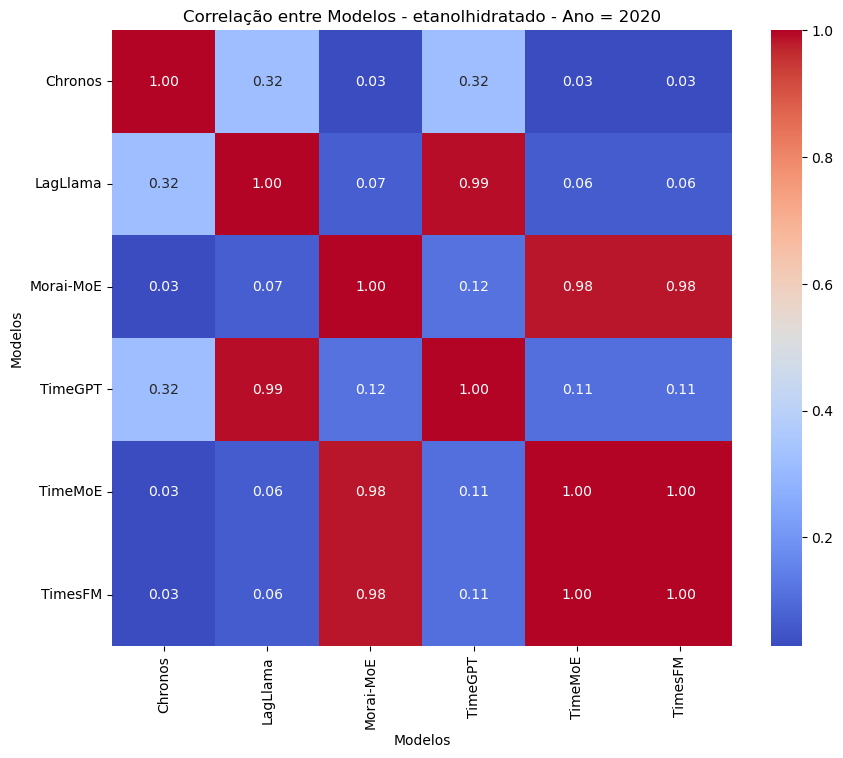

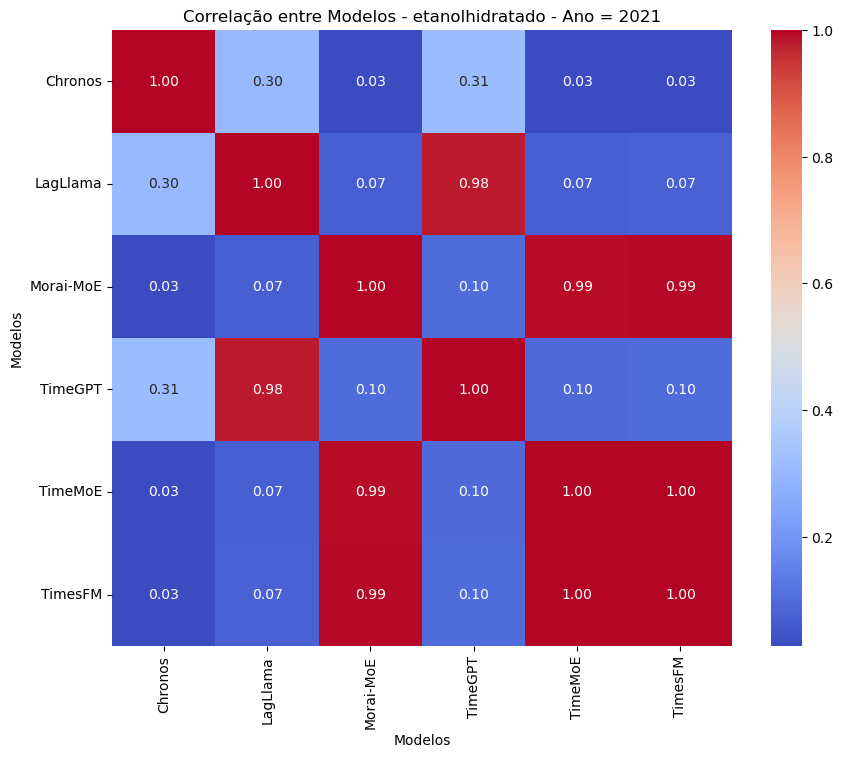

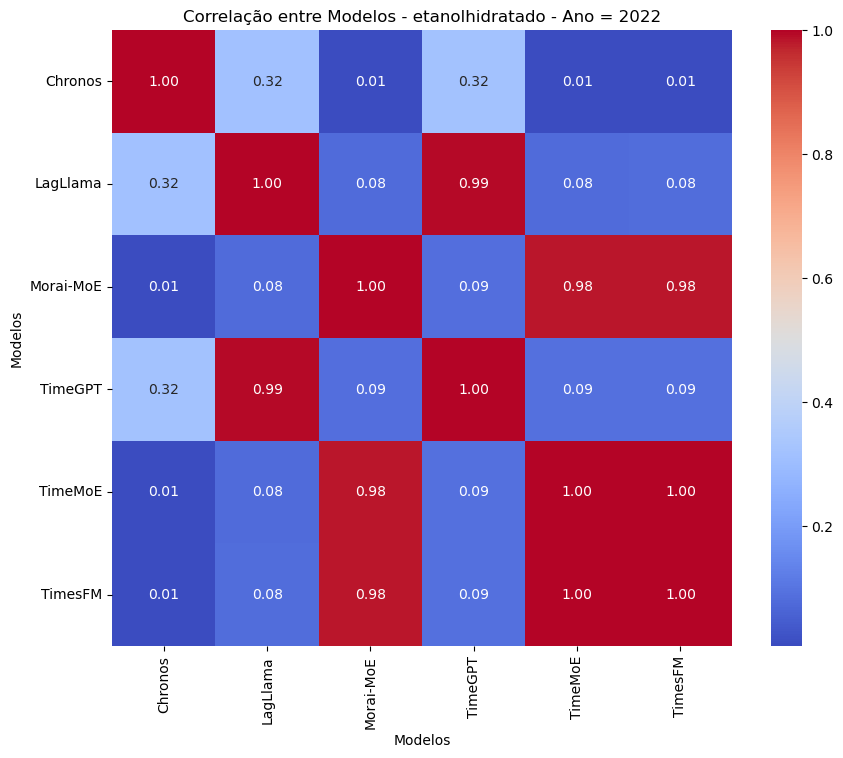

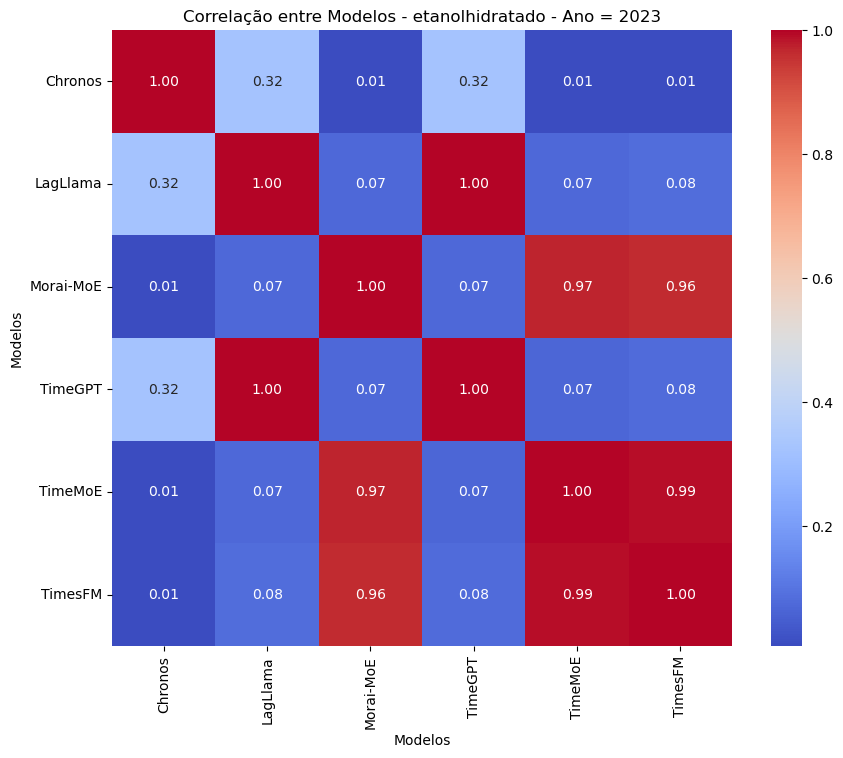

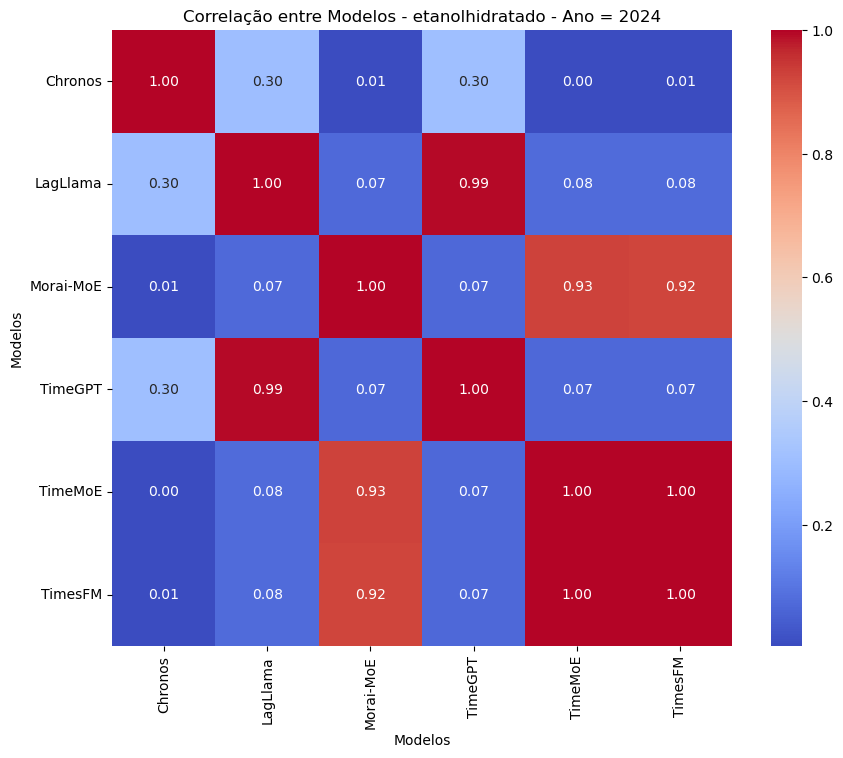

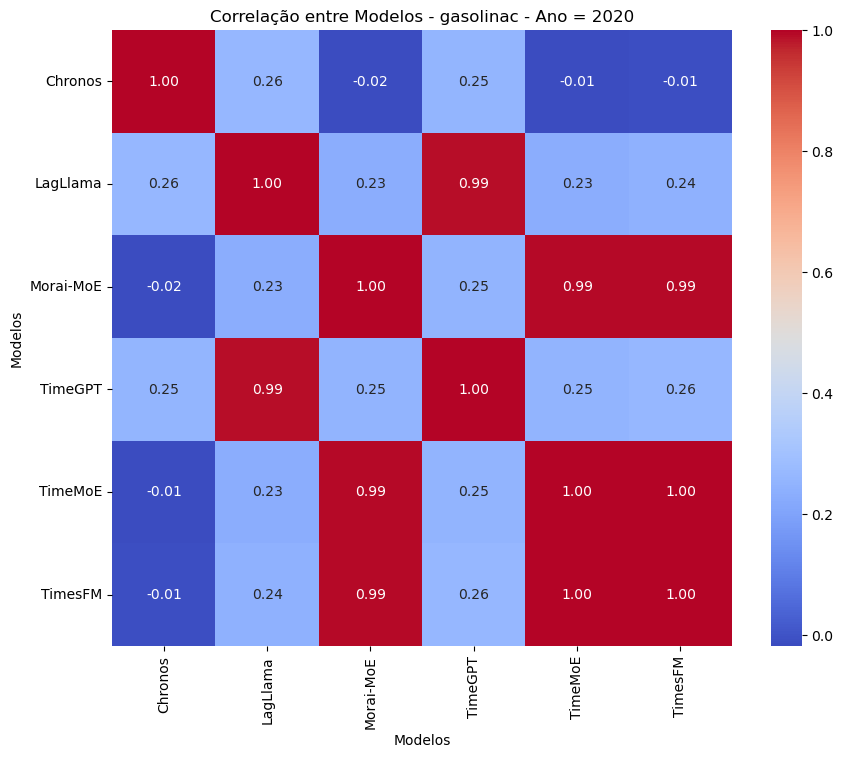

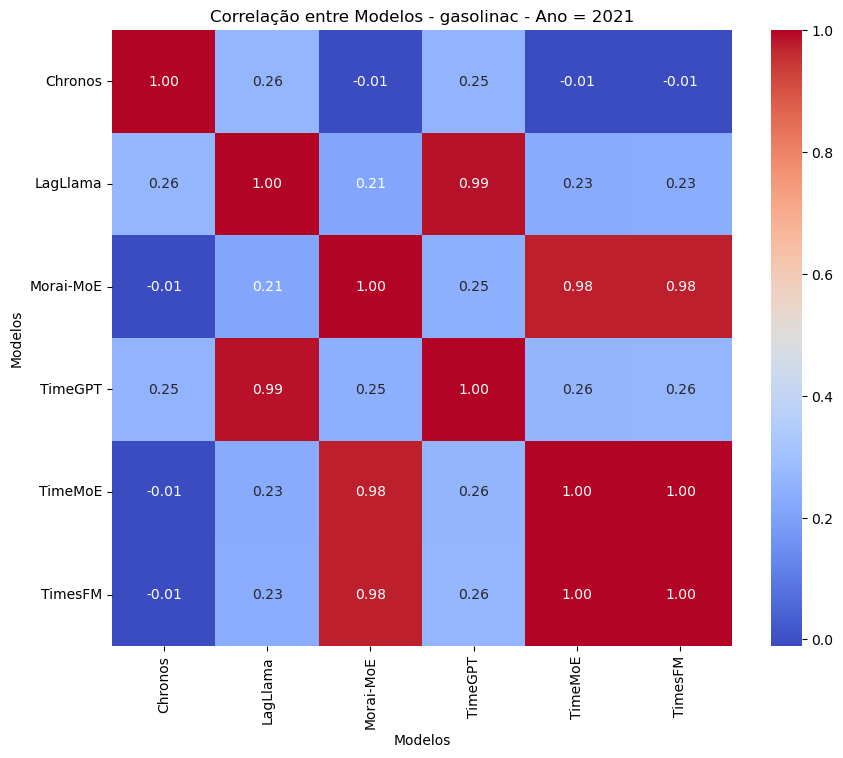

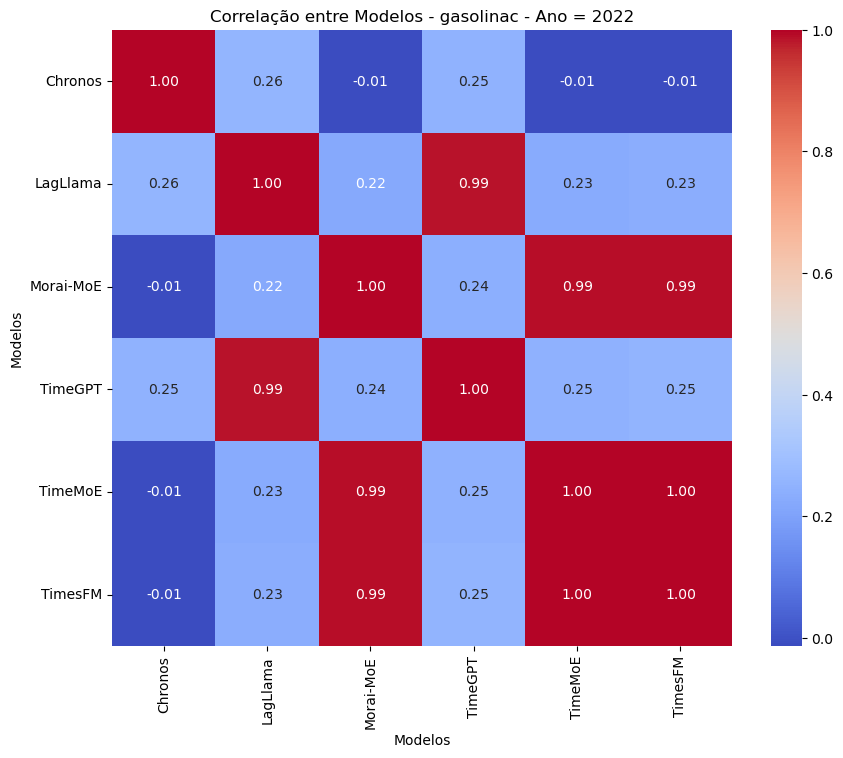

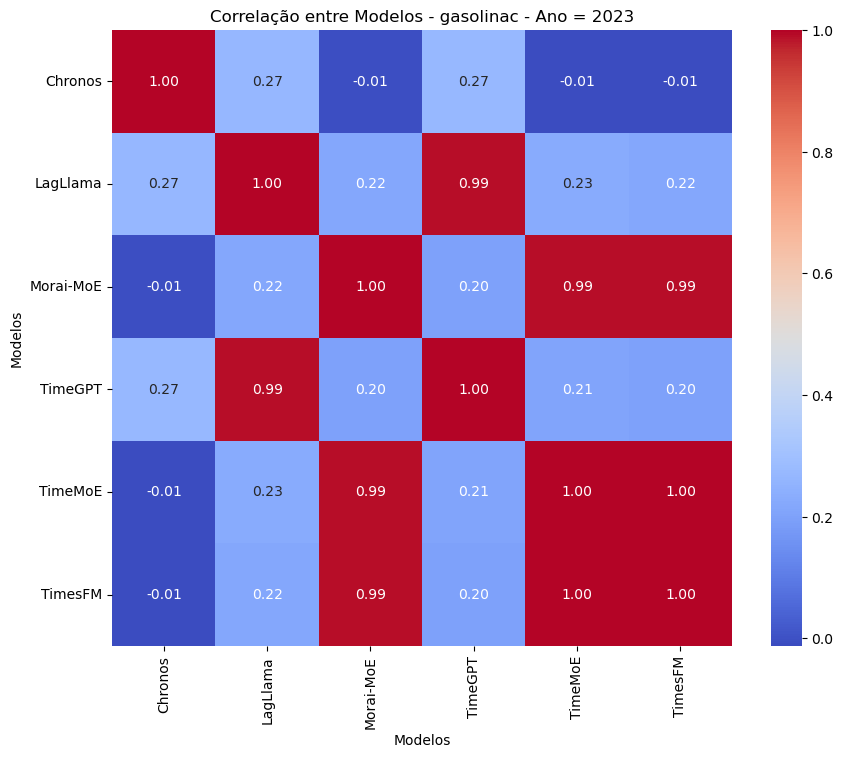

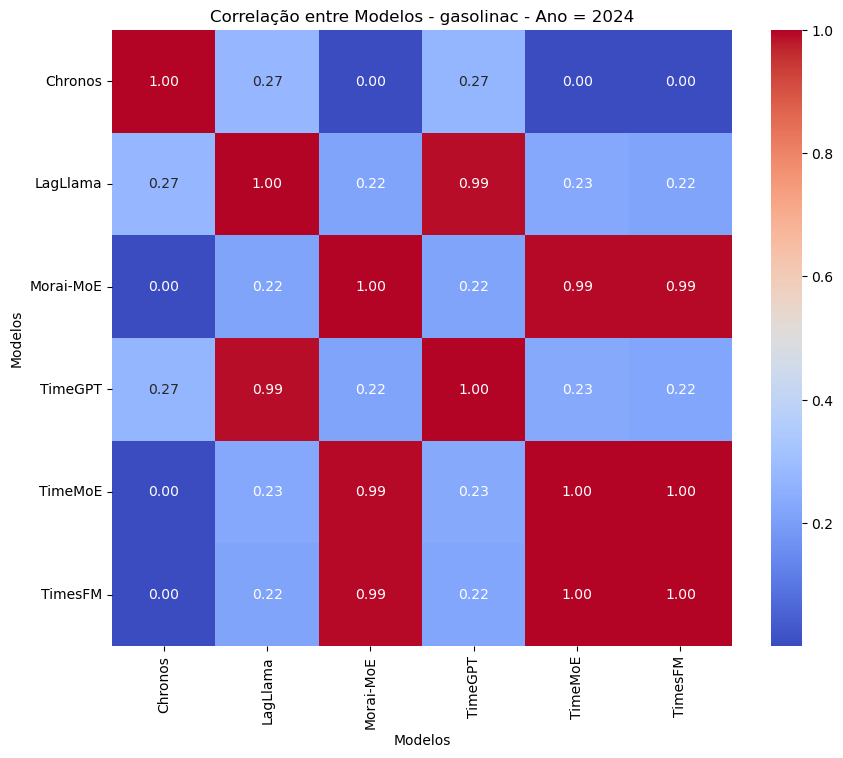

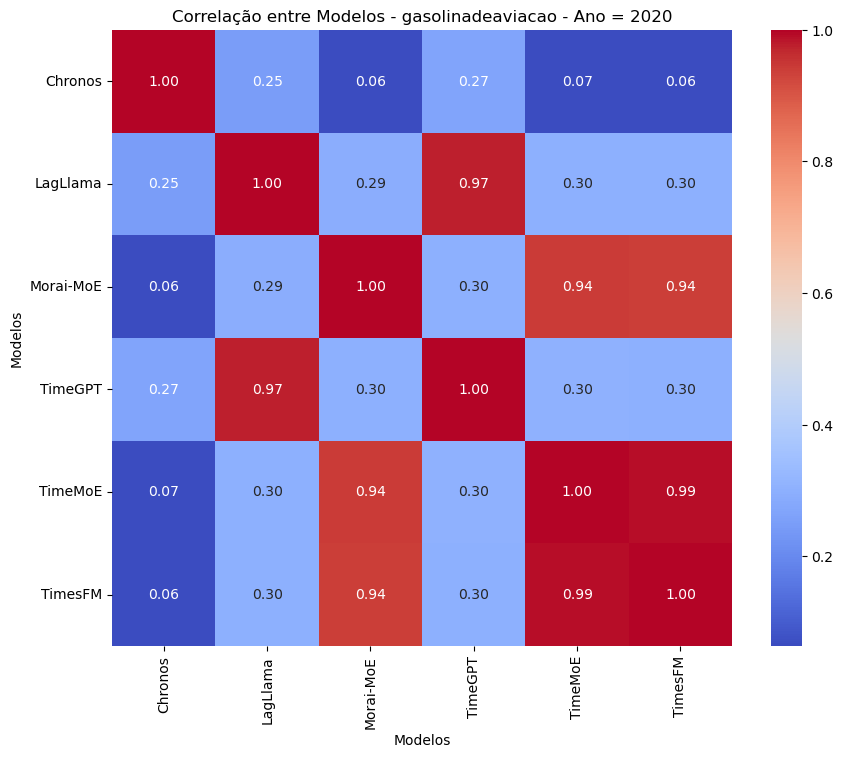

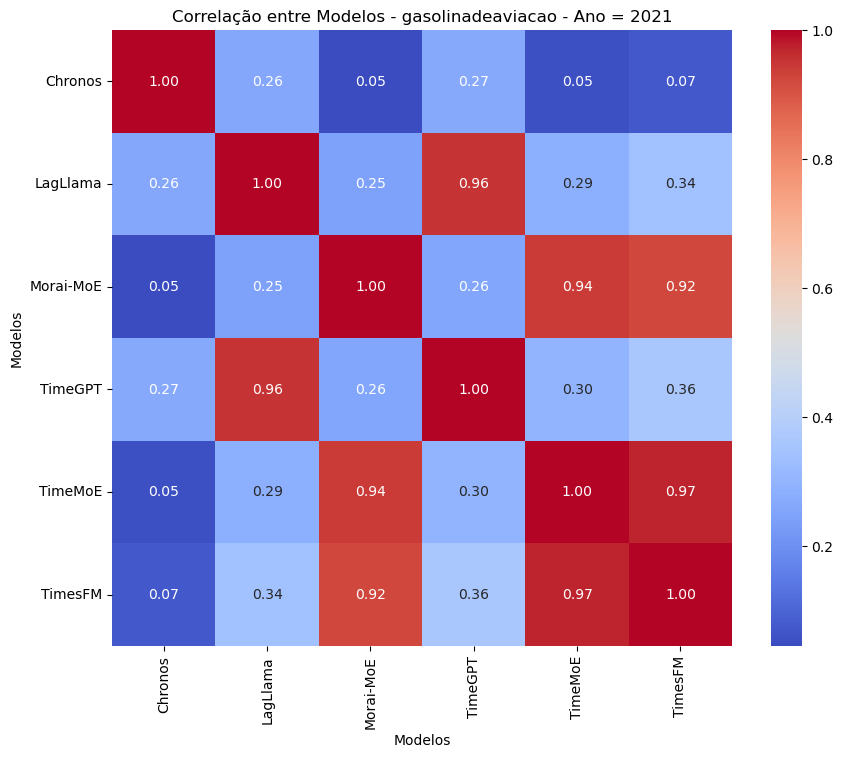

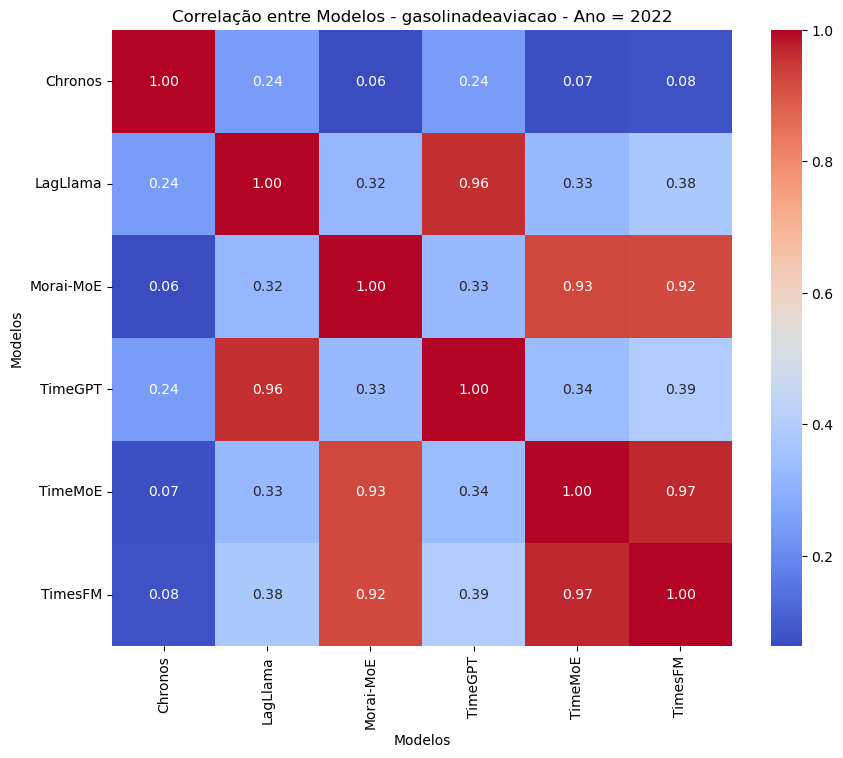

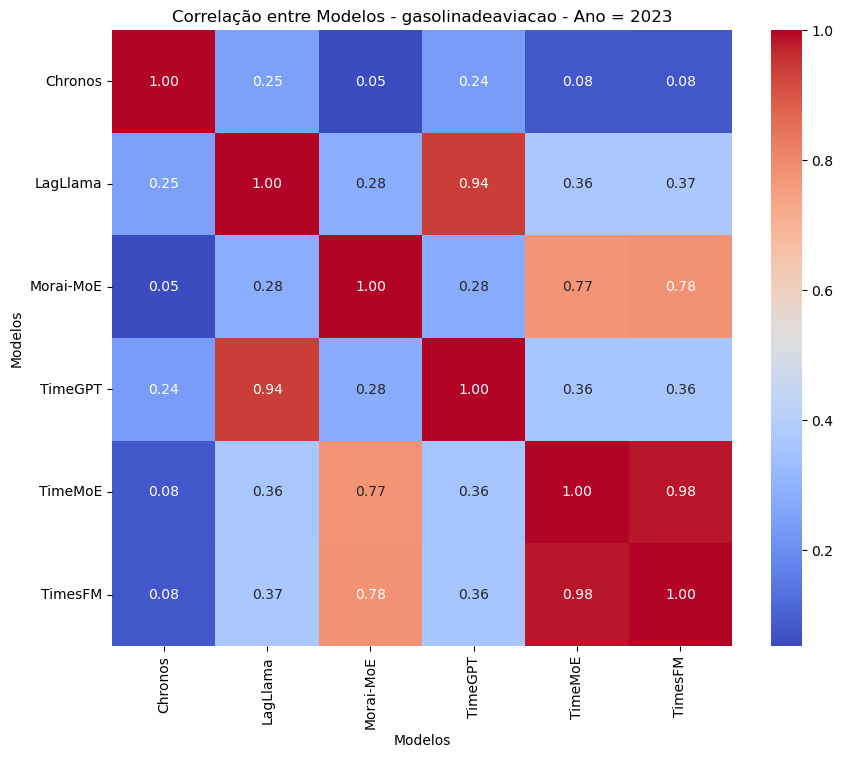

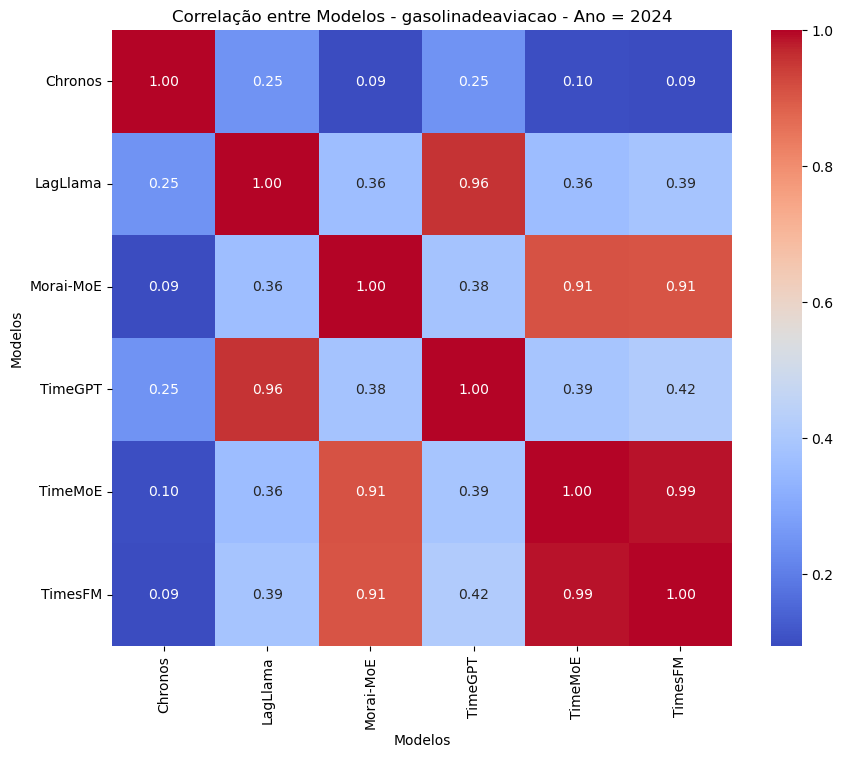

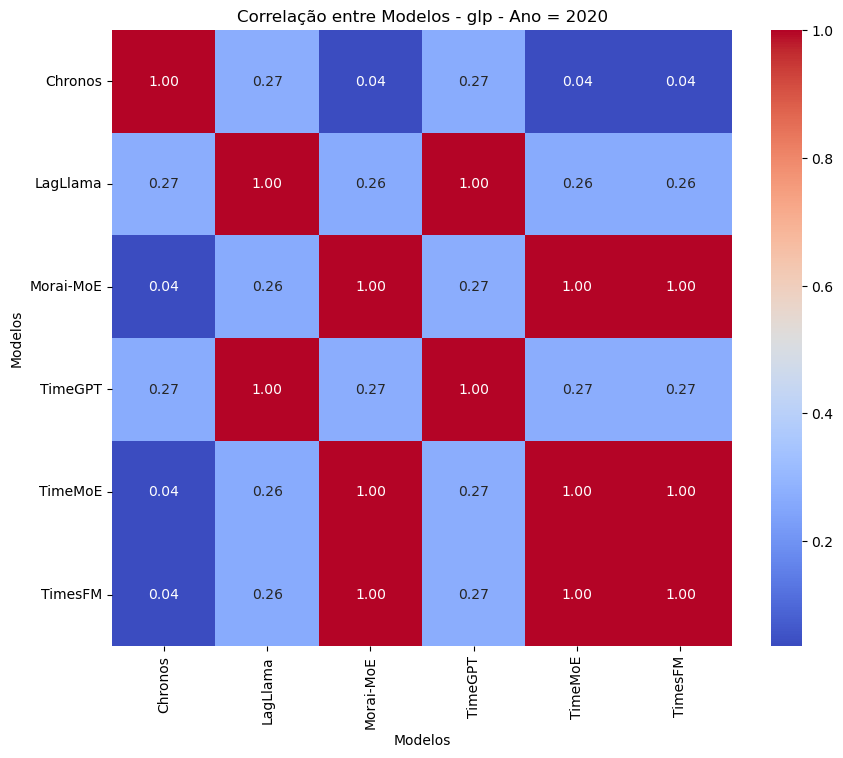

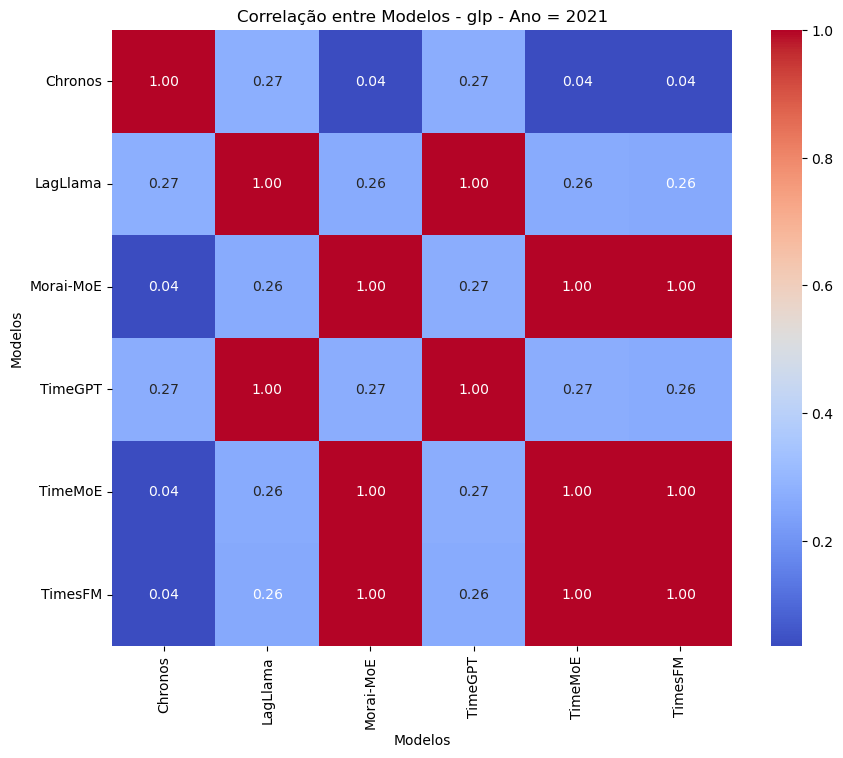

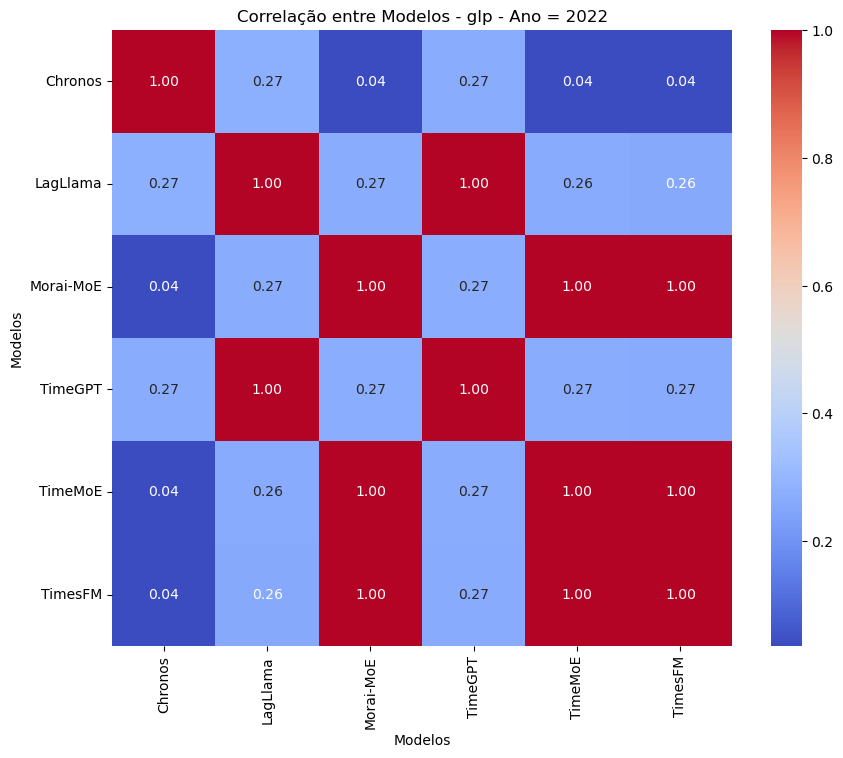

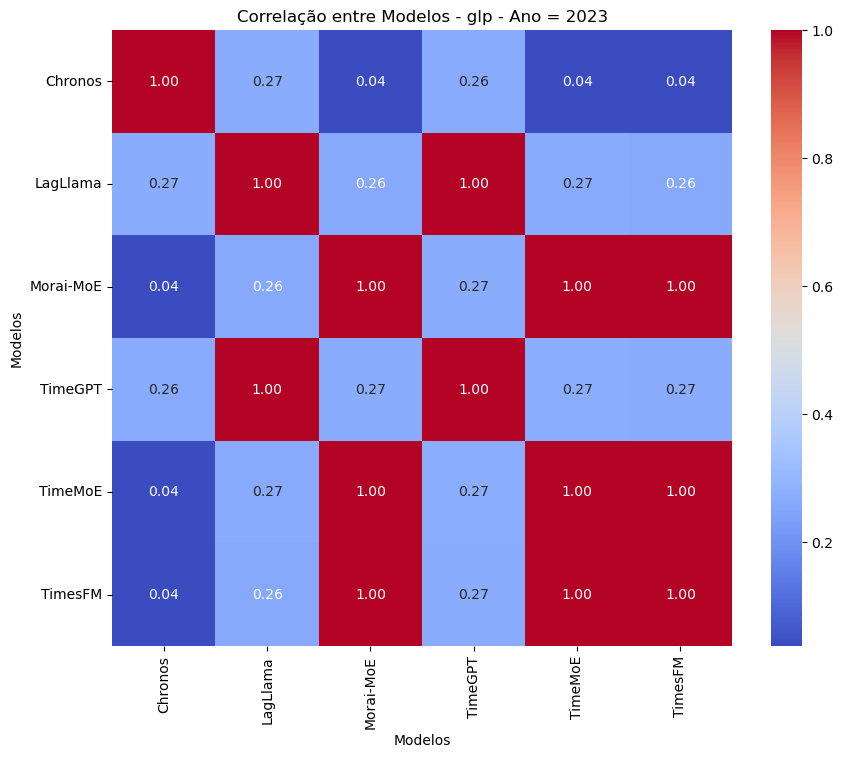

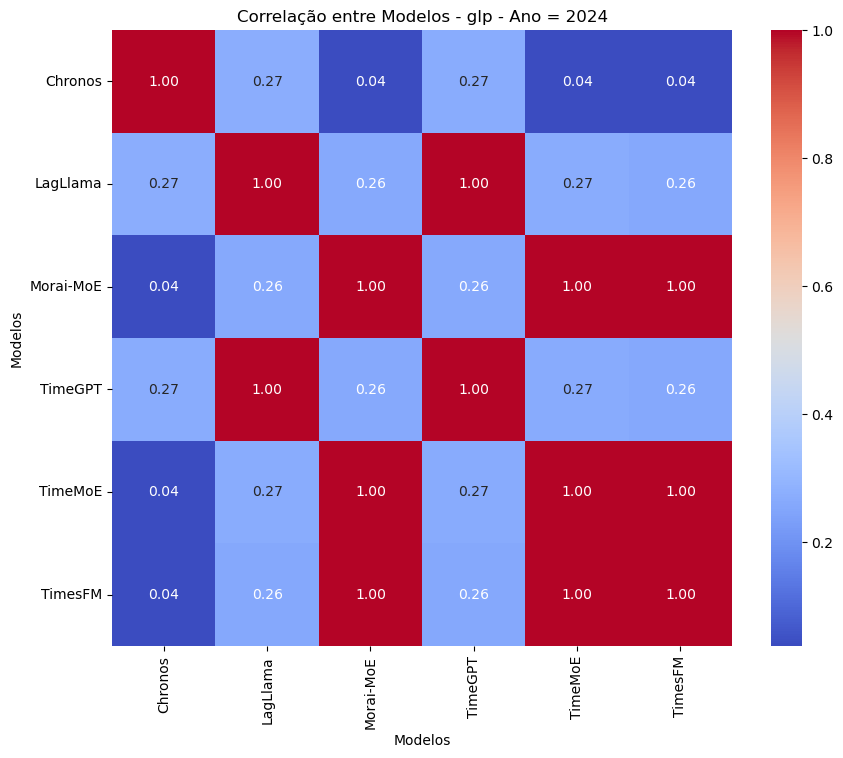

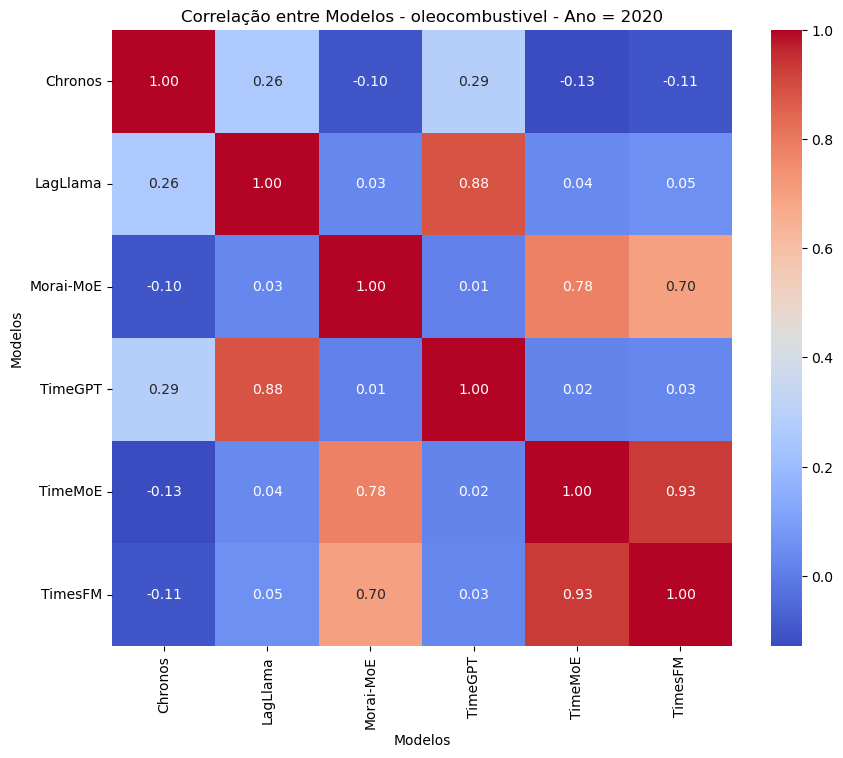

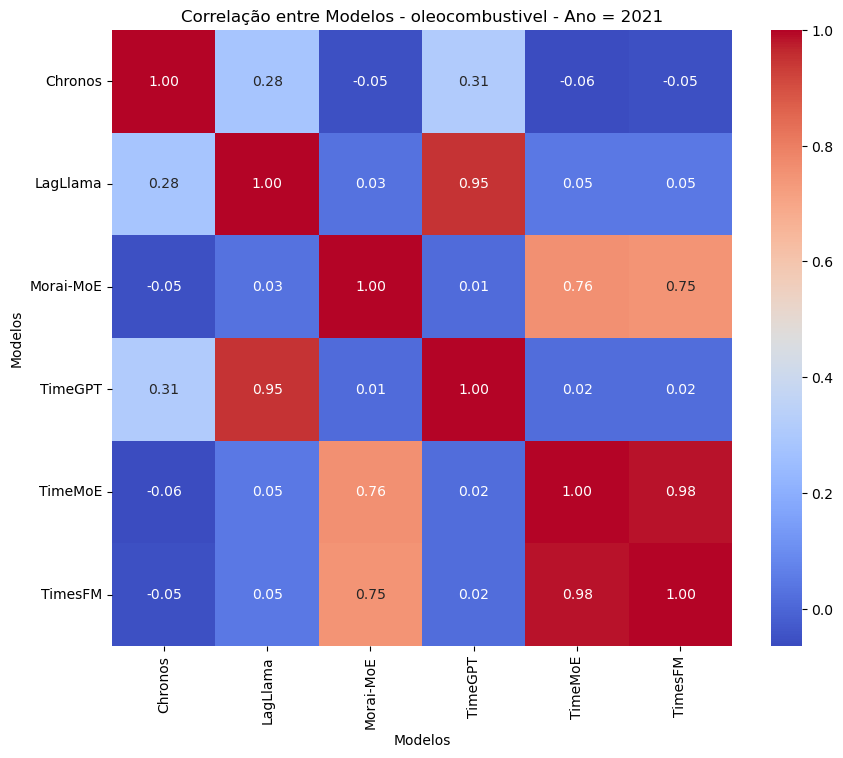

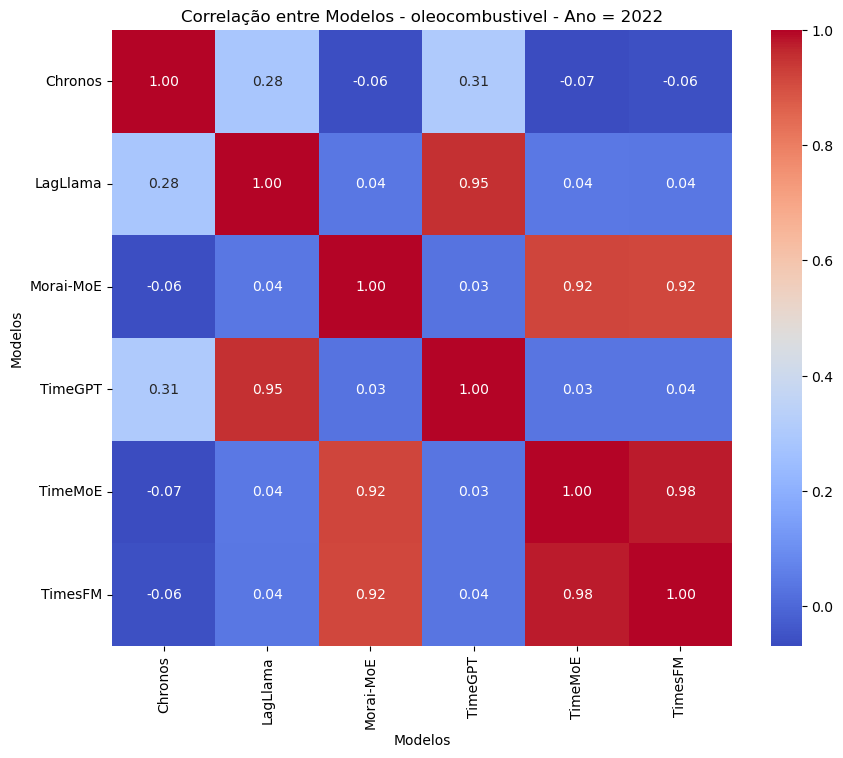

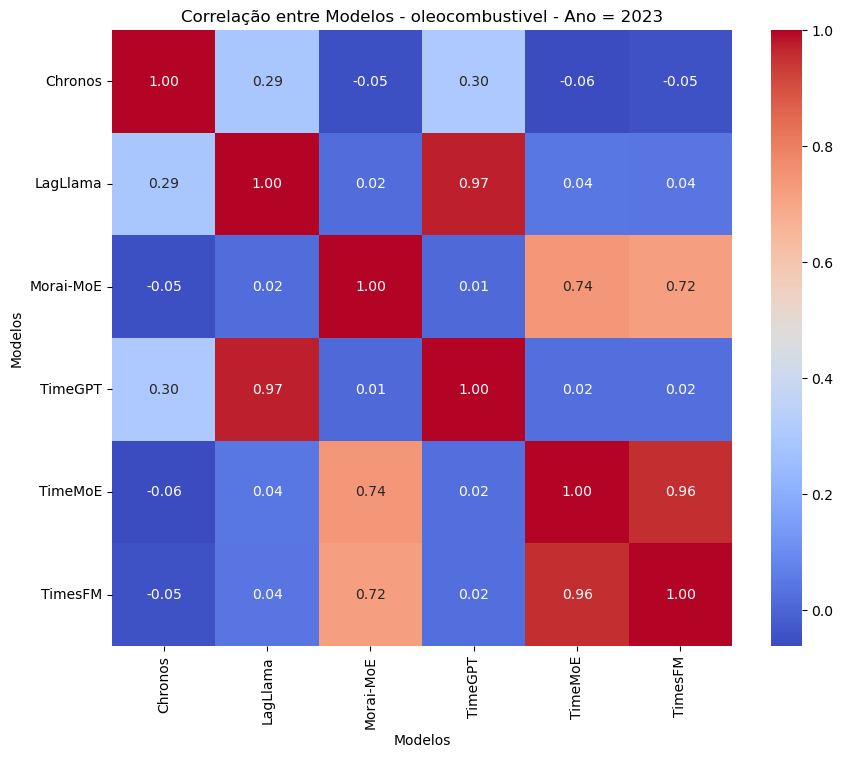

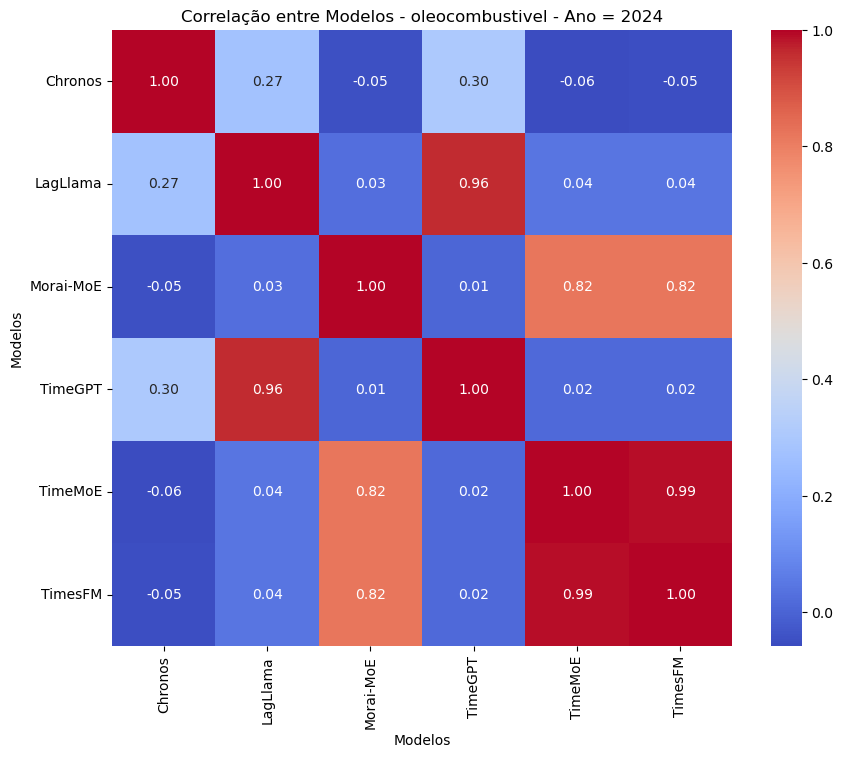

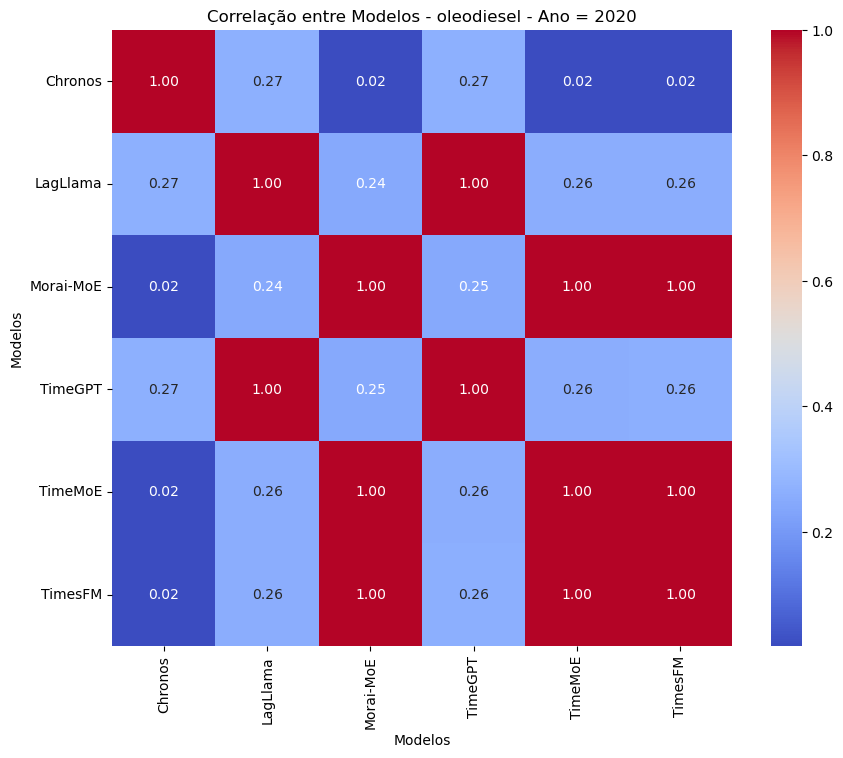

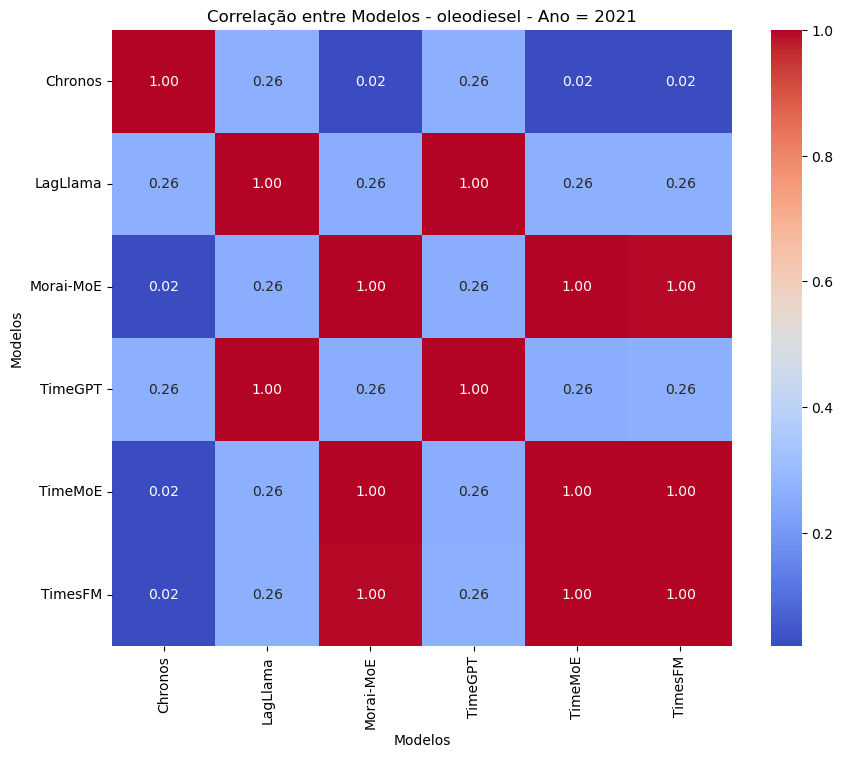

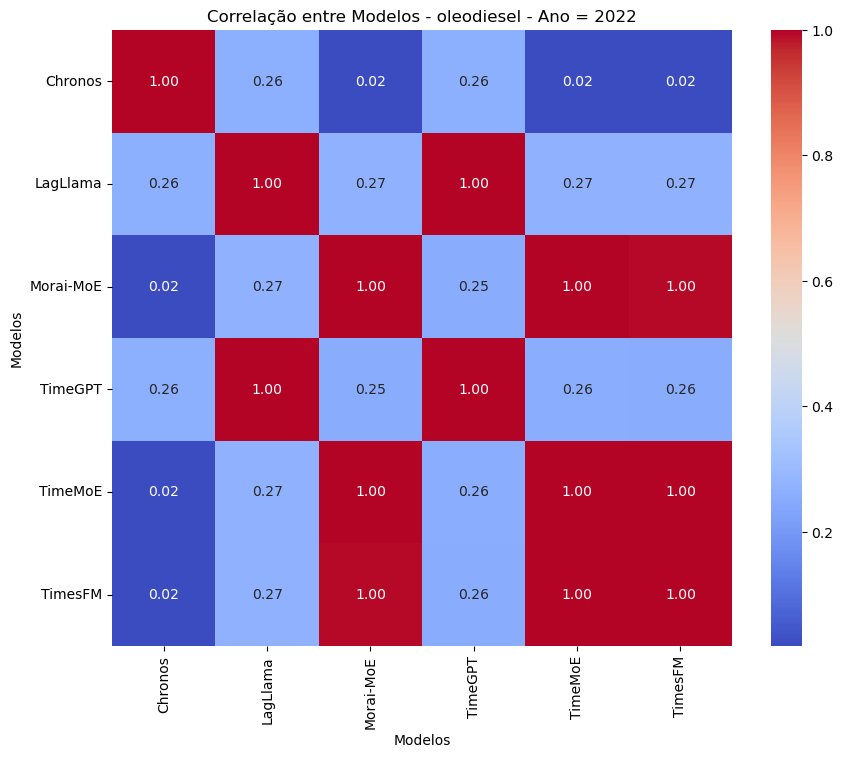

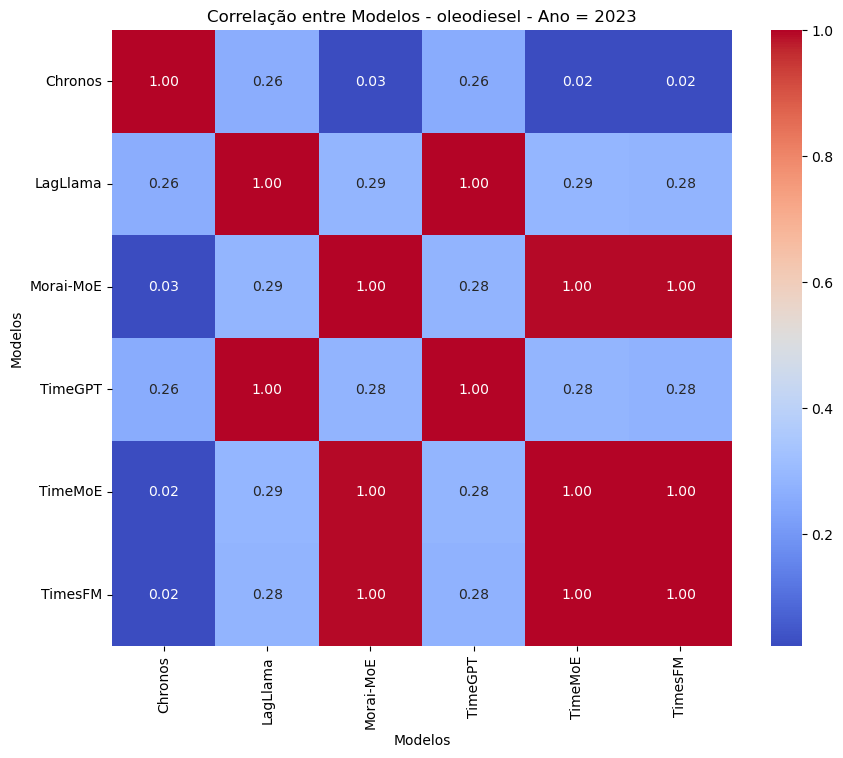

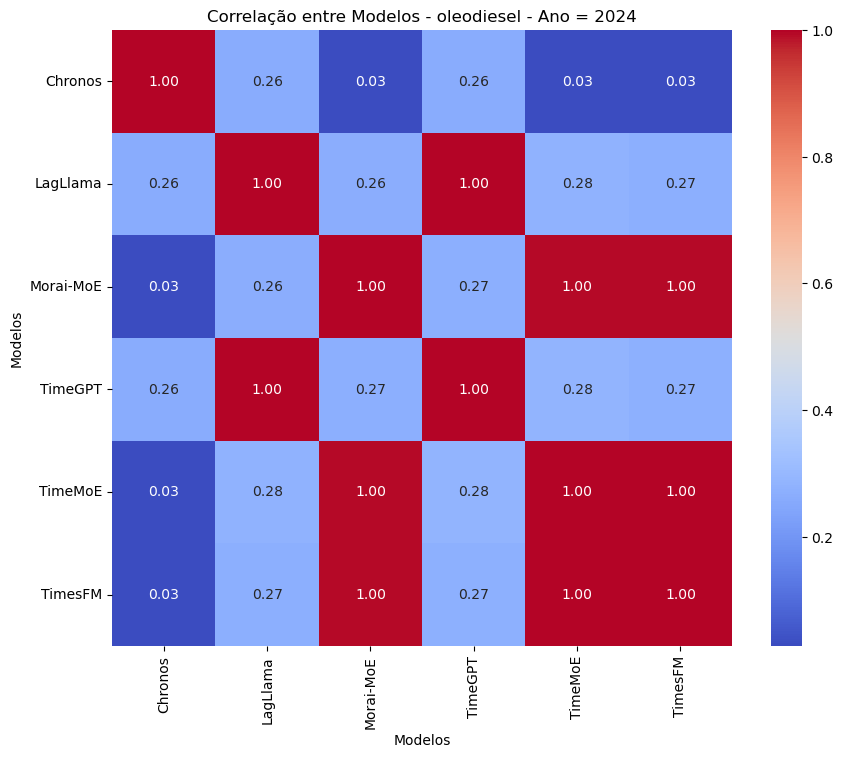

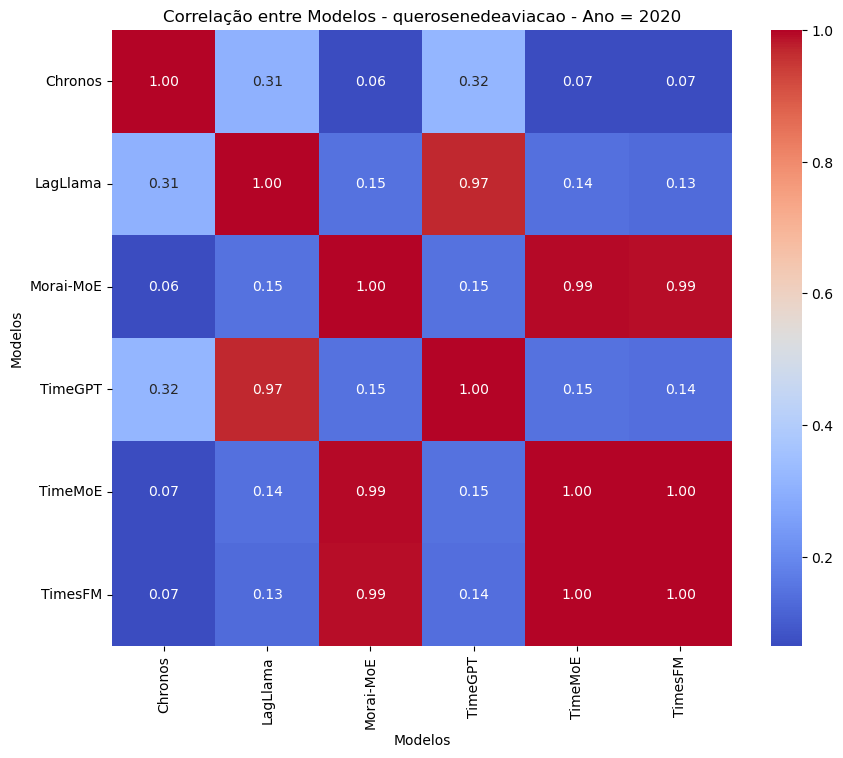

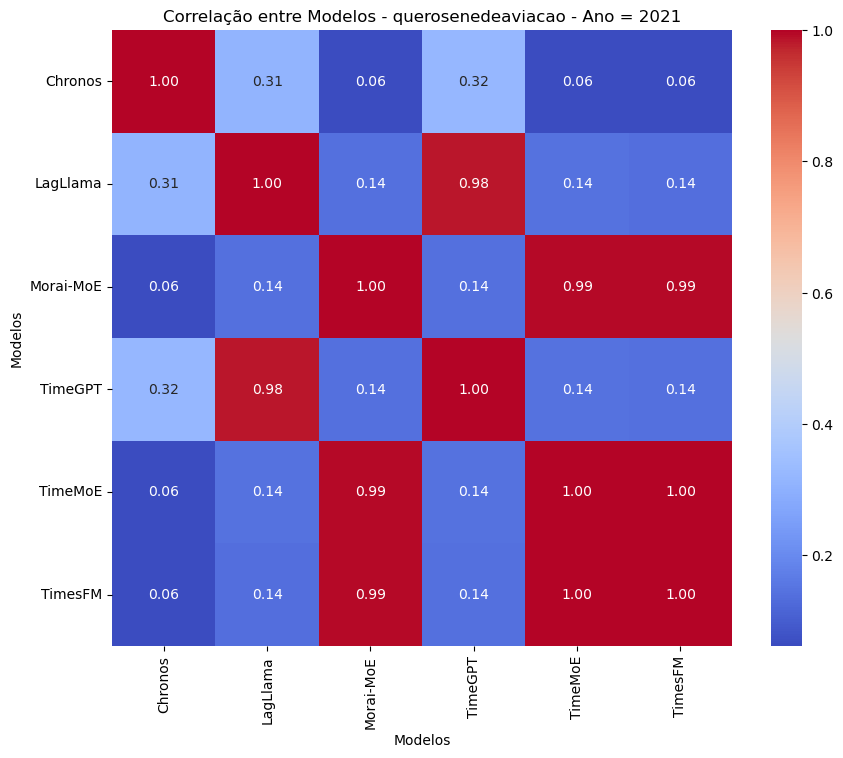

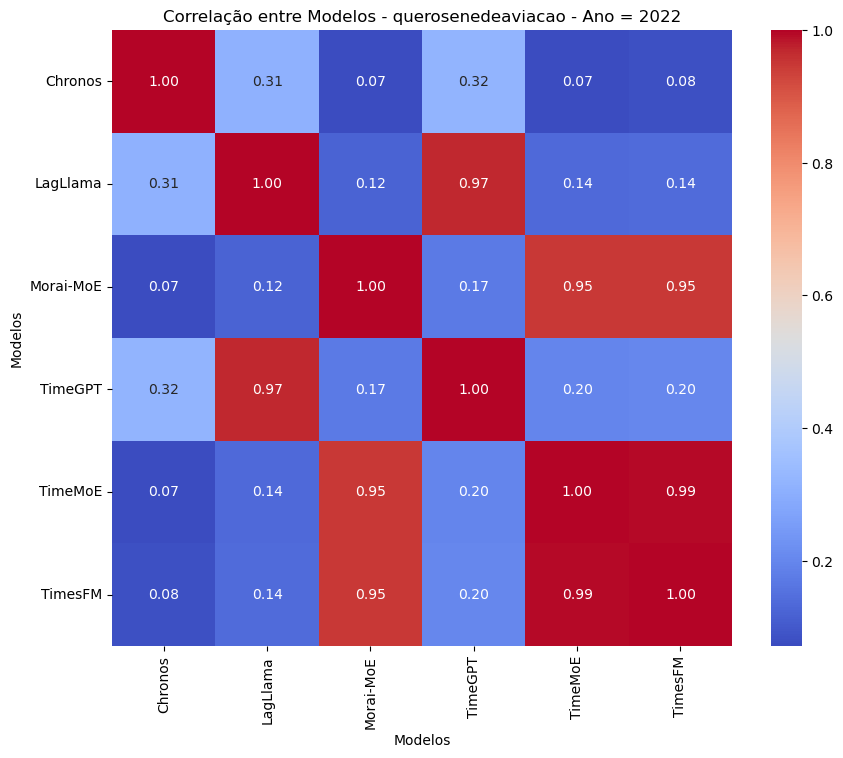

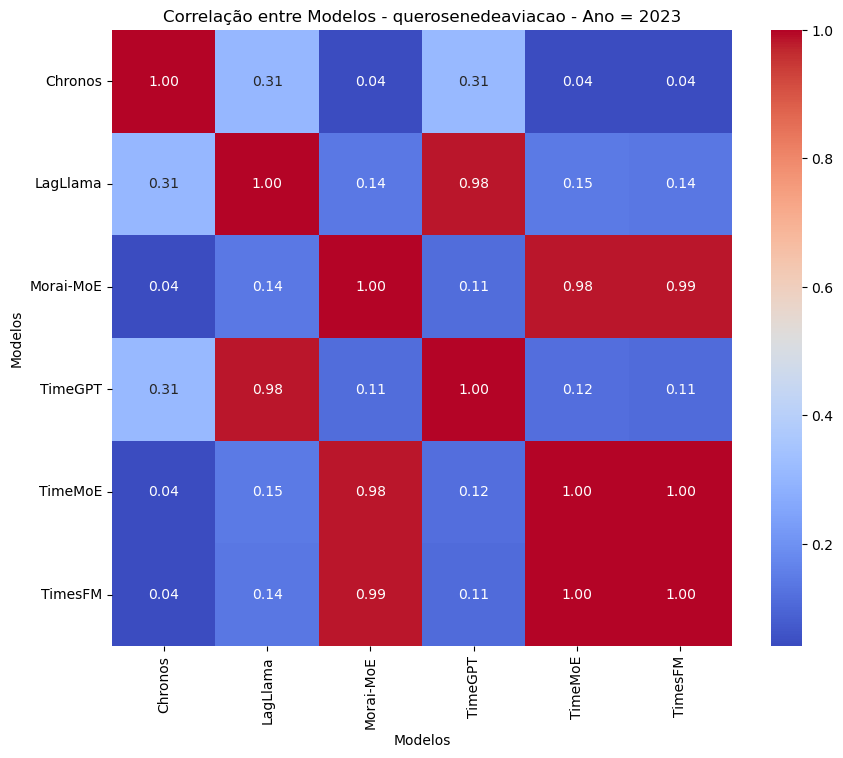

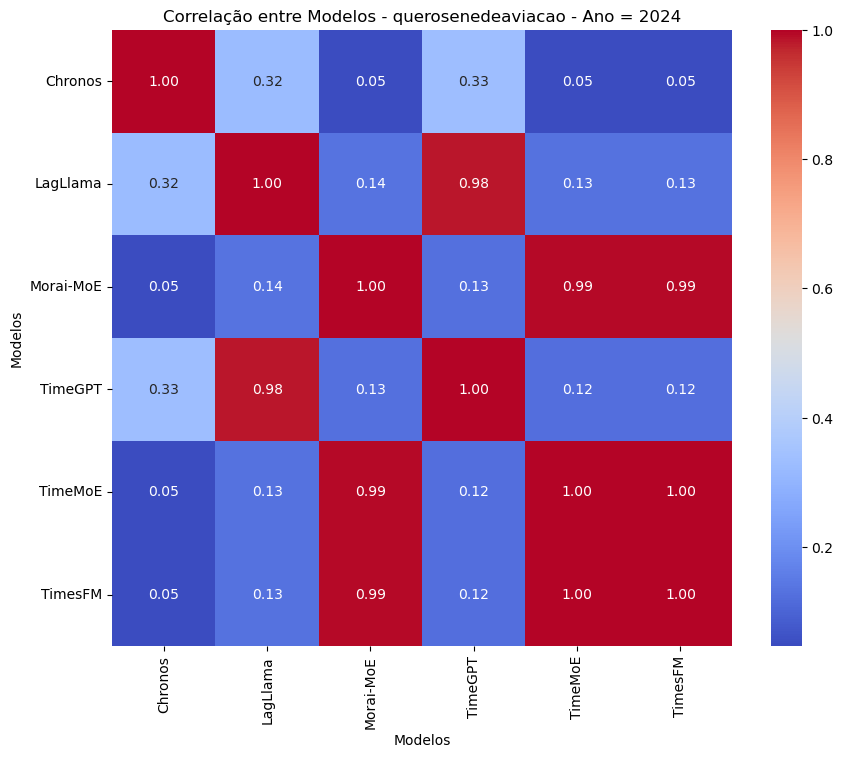

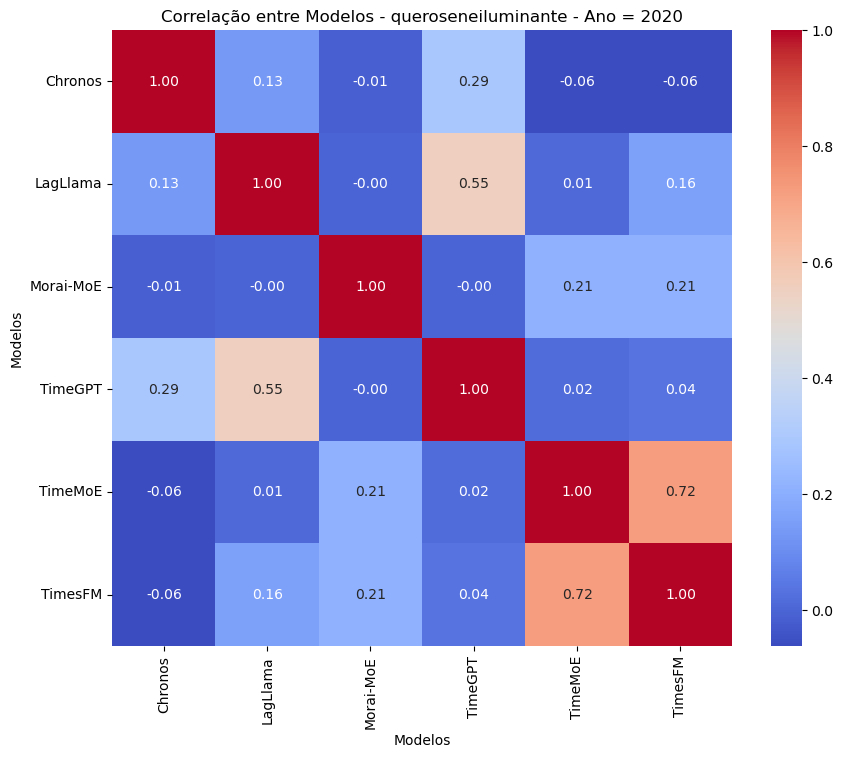

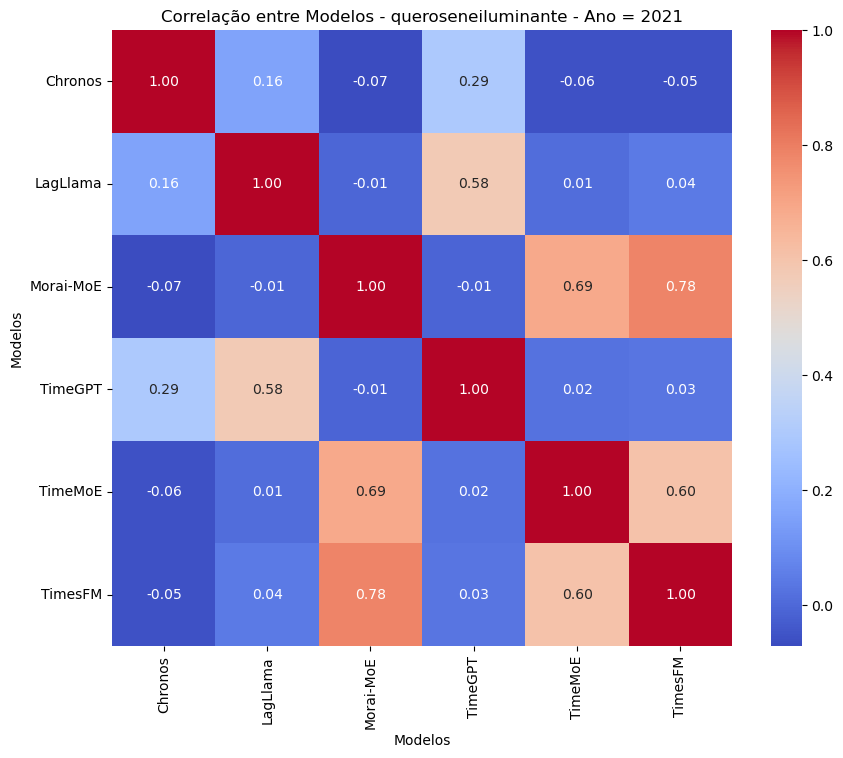

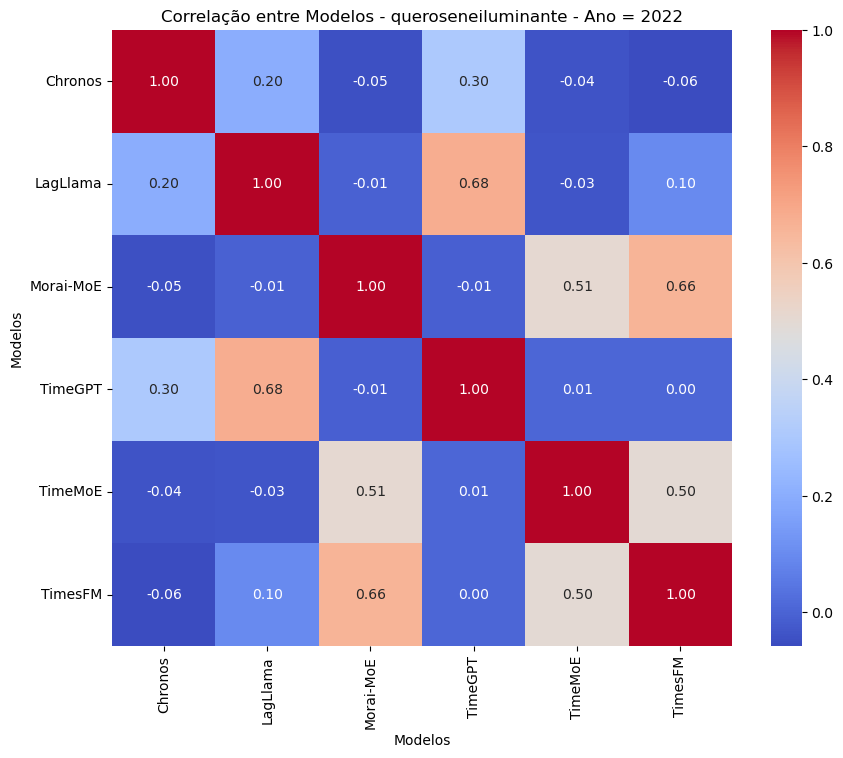

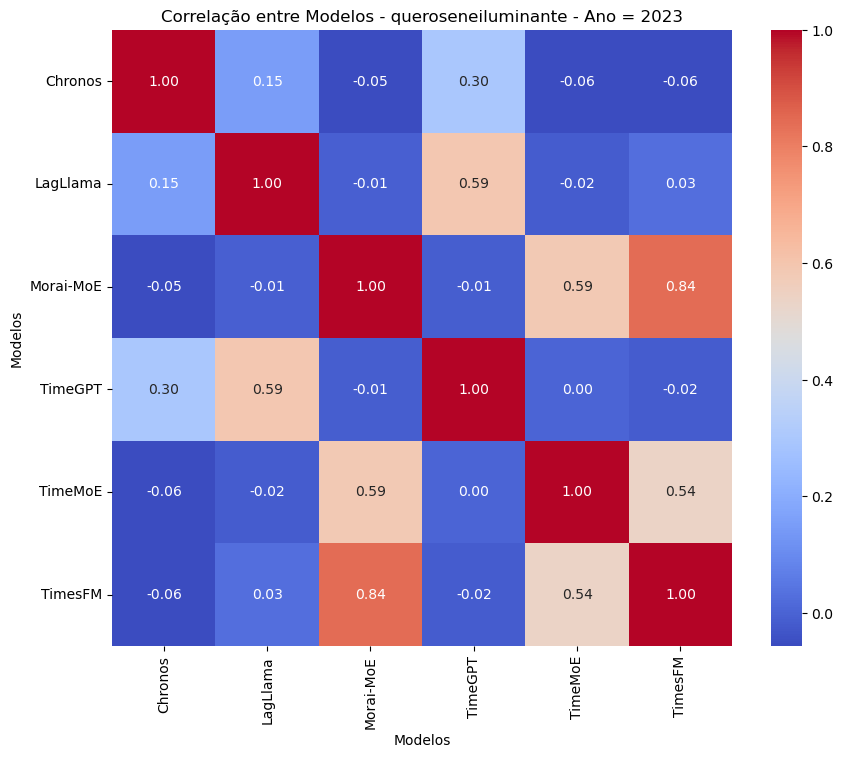

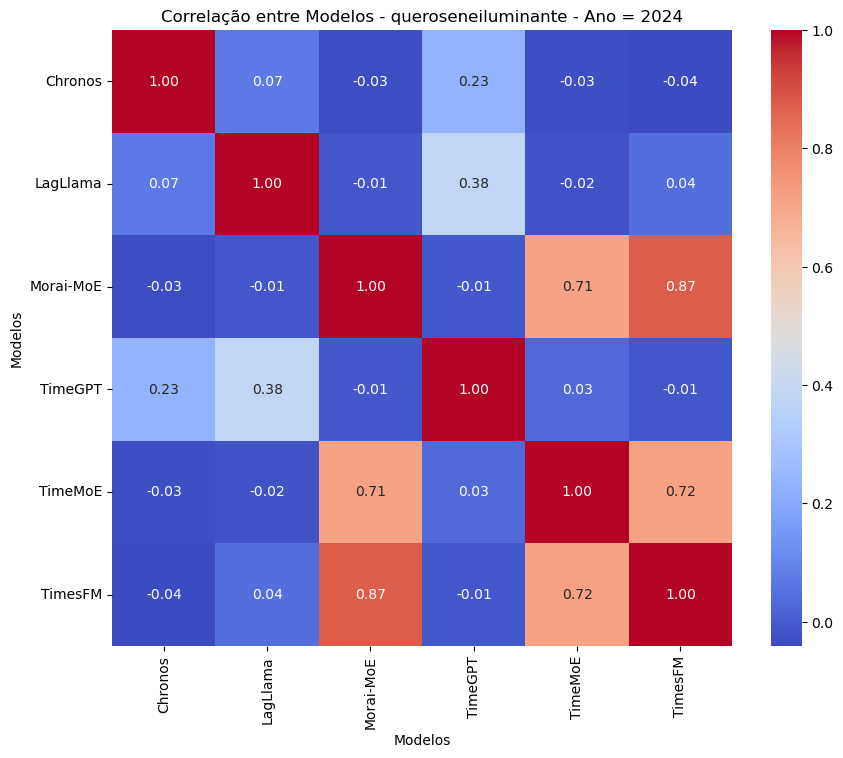

In [22]:
plot_correlations_by_year(df_filtrado)